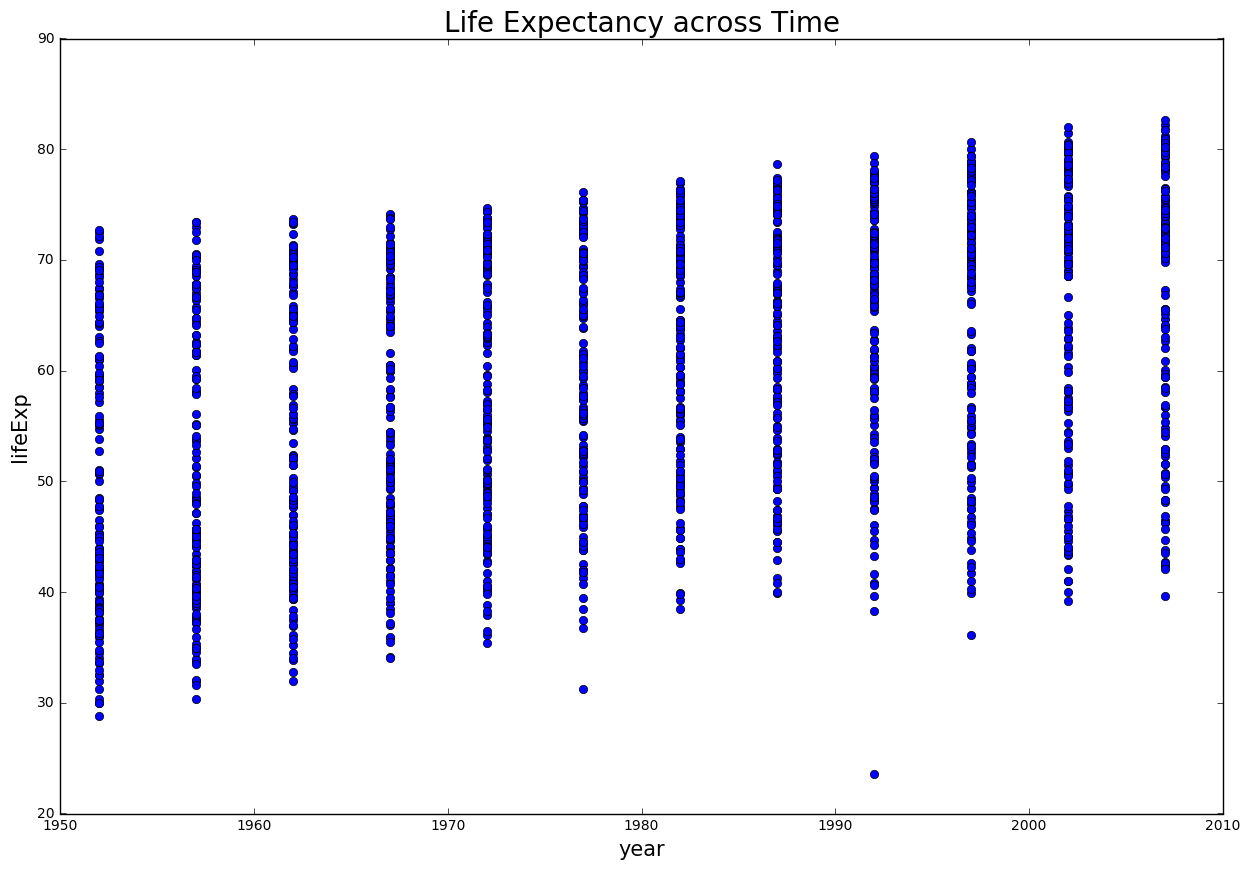

,year,lifeExp
0,1952,28.801
1,1952,67.410
2,1952,37.003
3,1952,43.160
4,1952,30.000
5,1952,67.500
6,1952,43.149
7,1952,65.860
8,1952,42.023
9,1952,33.609


In [162]:
################################################################################################
################ CMSC320 HW3: Regression analysis of Gapminder data
################ Group_Students: Ang Zhou, Han Yang Shen, Jixiang Fan
################################################################################################

################ Part 1 ################
# Exercise1 #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("gap.tsv", sep='\t')
table_time_lifeexp = data[['year', 'lifeExp']].sort_values(by=['year'], ascending=True).reset_index(drop=True)

x_data = table_time_lifeexp['year'].values
y_data = table_time_lifeexp ['lifeExp'].values

plt.figure(figsize=(15,10))
plt.plot(x_data, y_data,'o')
plt.xlabel("year", fontsize=15)
plt.ylabel("lifeExp", fontsize=15)
plt.title("Life Expectancy across Time", fontsize=20)

plt.show()

table_time_lifeexp

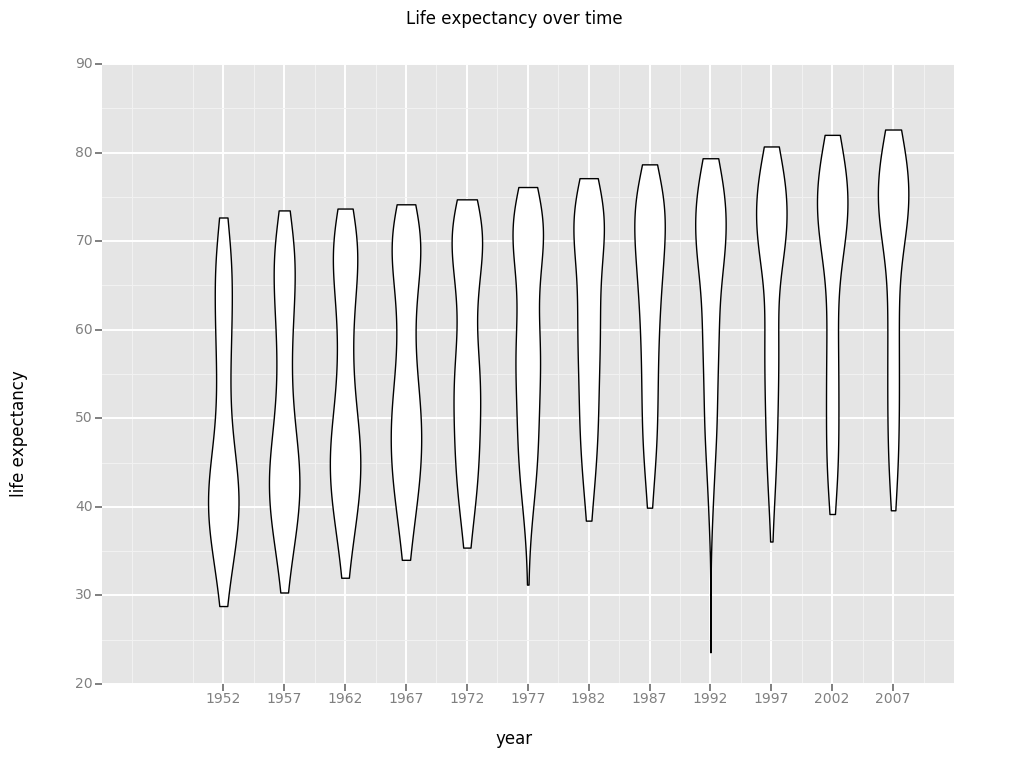

<ggplot: (96222340833)>

In [163]:
# Question1 #
from ggplot import *

ggplot(aes(x='year', y='lifeExp'), data = table_time_lifeexp) +\
    geom_violin() +\
    labs(title="Life expectancy over time",
         x = "year",
         y = "life expectancy")
# There is an increasing general trend for life expectancy across. 
# This trend is linear since from the plot we can clearly see that across 
# time the distribution of life expectancy goes from bottom-heavy to top-heavy.


In [164]:
# Question2 #
# The distribution of life expectancy across countries has the trend from bottom-heavy to top-heavy.
# In year 1952, the distribution of life expectancy is concentrated most at the bottom. From year 1982 to 2007,
# there is a clear trend that the distribution of life expectancy moves to the top half that is top-heavy. 
# We cannot clear say where the mode is because protruding parts (peaks) on the topside and bottom side in the middle year from 1957 to 1977. 
# Thus from year 1957 to 1977, it is unimodal. And the rest years appear to be bimodal. 
# In year 1977, 1992 and 1997 there is a skew since the tails on the plots. 
# The distribution of life expectancy across countries plot is not symmetric around its center.

In [165]:
# Question3 #
# In this sample, we can intuitively and visually saw there is a strong relationship 
# between year and life expectancy. However, the given sample did not contain enough 
# information to provide that null hypothesis was true. Thus reject the null hypothesis.

In [166]:
# Question4 #
#The graph should be linear.

In [167]:
# Question5 #
#The plot should be linear and also centered around zero.

Linear Regression: y = [ 0.32590383]x + [-585.65218744]
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sun, 23 Apr 2017   Prob (F-statistic):           7.55e-80
Time:                        17:00:19   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------

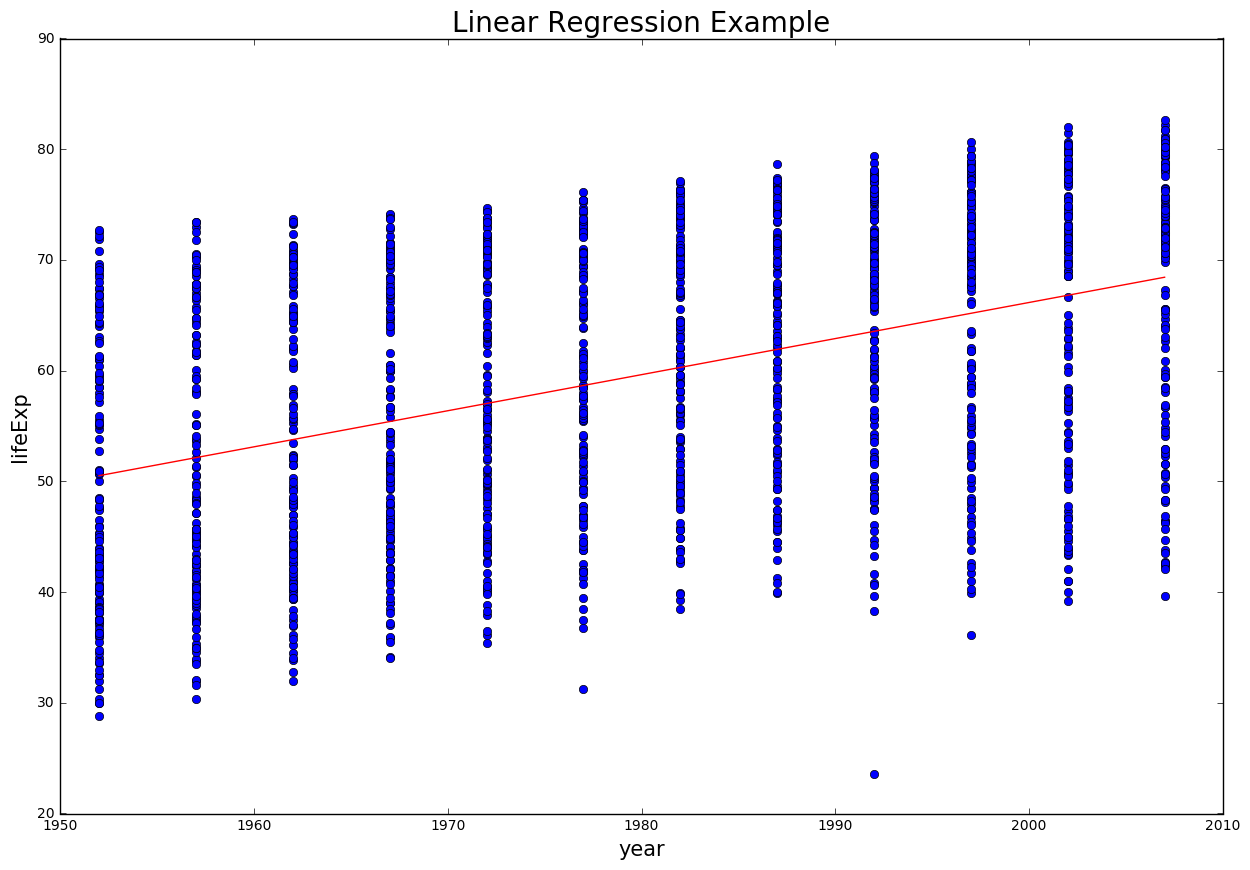

In [168]:
# Exercise2 #

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

npMatrix = np.matrix(table_time_lifeexp)
X, Y = npMatrix[:,0], npMatrix[:,1]
mdl = LinearRegression().fit(X,Y) 
m = mdl.coef_[0]
b = mdl.intercept_
print ("Linear Regression: y = {0}x + {1}".format(m, b))

result = sm.ols(formula="lifeExp ~ year", data=table_time_lifeexp).fit()
print (result.summary())

x_1 = np.linspace(x_data.min(), x_data.max(), 100)
y_1 = x_1*m+b

plt.figure(figsize=(15,10))
plt.plot(x_data, y_data,'o',x_1,y_1,'r')
plt.title('Linear Regression Example', fontsize = 20)
plt.xlabel("year", fontsize=15)
plt.ylabel("lifeExp", fontsize=15)
plt.show()

In [169]:
# Question6 #
#On average, the life expectancy increases by 0. 32590383 years every year across the world.

In [170]:
# Question7 #
#We reject the null hypothesis since the p-value is small, which is 7.6e-80.

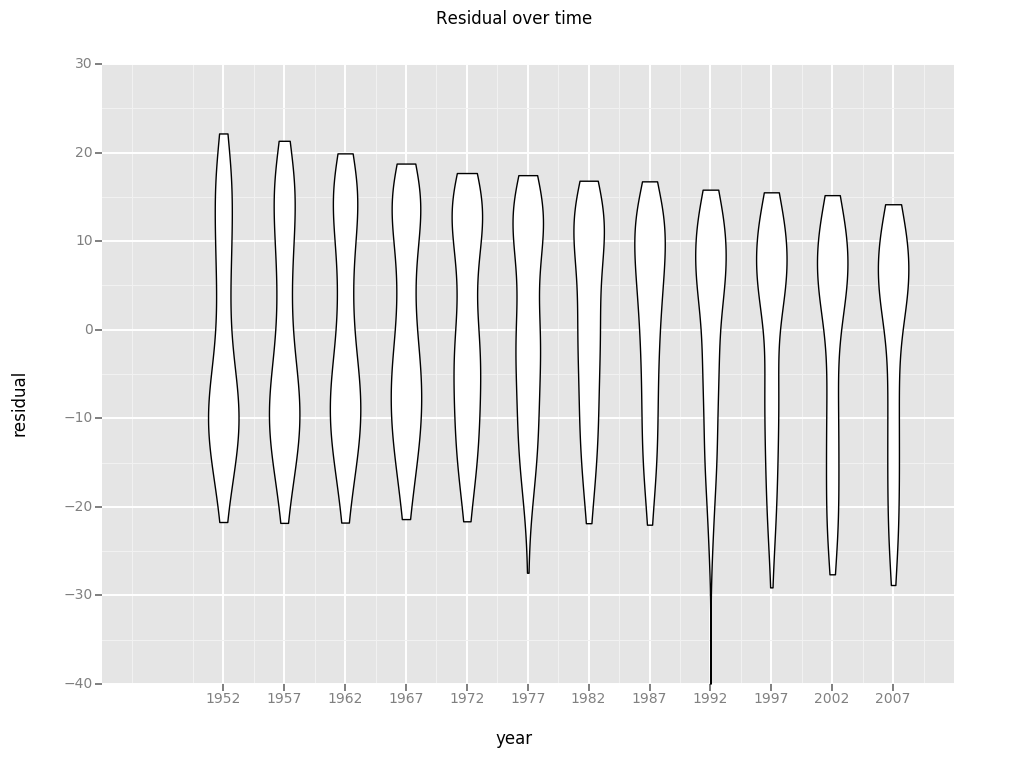

<ggplot: (96223232562)>

In [171]:
# Exercise3 #

residual = table_time_lifeexp.copy()
residual['residual'] =  residual['lifeExp'] - (residual['year']*m+b)
residual = residual.drop(['lifeExp'], 1)

ggplot(aes(x='year', y='residual'), data = residual) +\
    geom_violin() +\
    labs(title="Residual over time",
         x = "year",
         y = "residual")

In [172]:
# Question8 #
#Yes, the plot of Exercise 3 matches my expectations since it is linear.

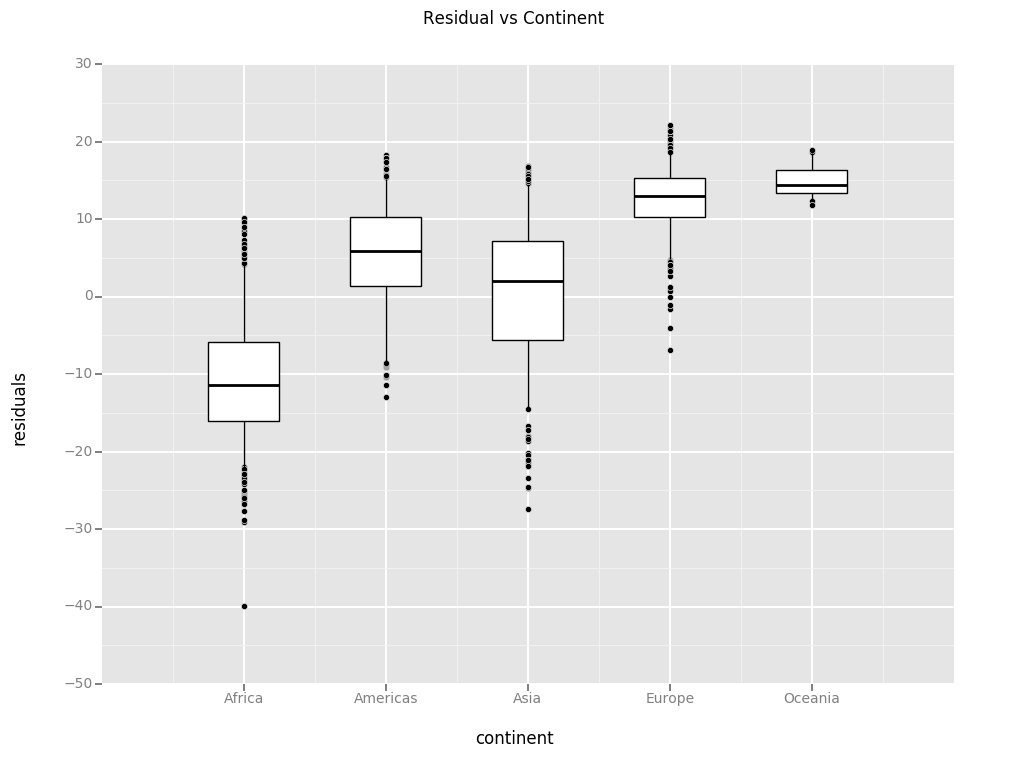

<ggplot: (-9223371940631525807)>

In [173]:
# Exercise4 #

residual_cont = data[['year', 'lifeExp', 'continent']].copy()
residual_cont['residual'] =  residual_cont['lifeExp'] - (residual_cont['year']*m+b)
residual_cont_1 = residual_cont.drop(['lifeExp', 'year'], 1)

ggplot(aes(x='continent', y='residual'), data = residual_cont_1) +\
    geom_boxplot() +\
    labs(title="Residual vs Continent",
         x = "continent",
         y = "residuals")

In [174]:
# Question9 #
#No, there is no dependence between model residual and continent. 
#From the plot, there is no trend in residuals as a function of continent.

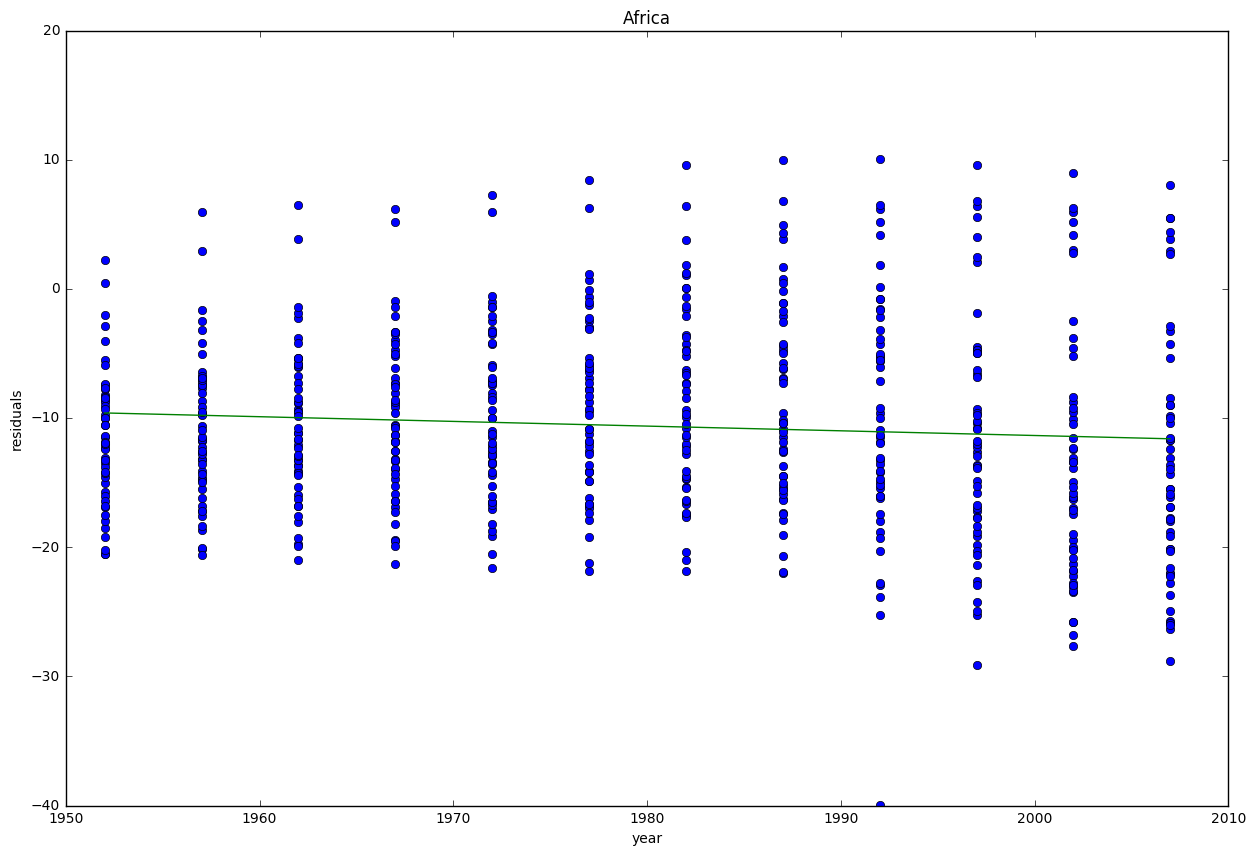

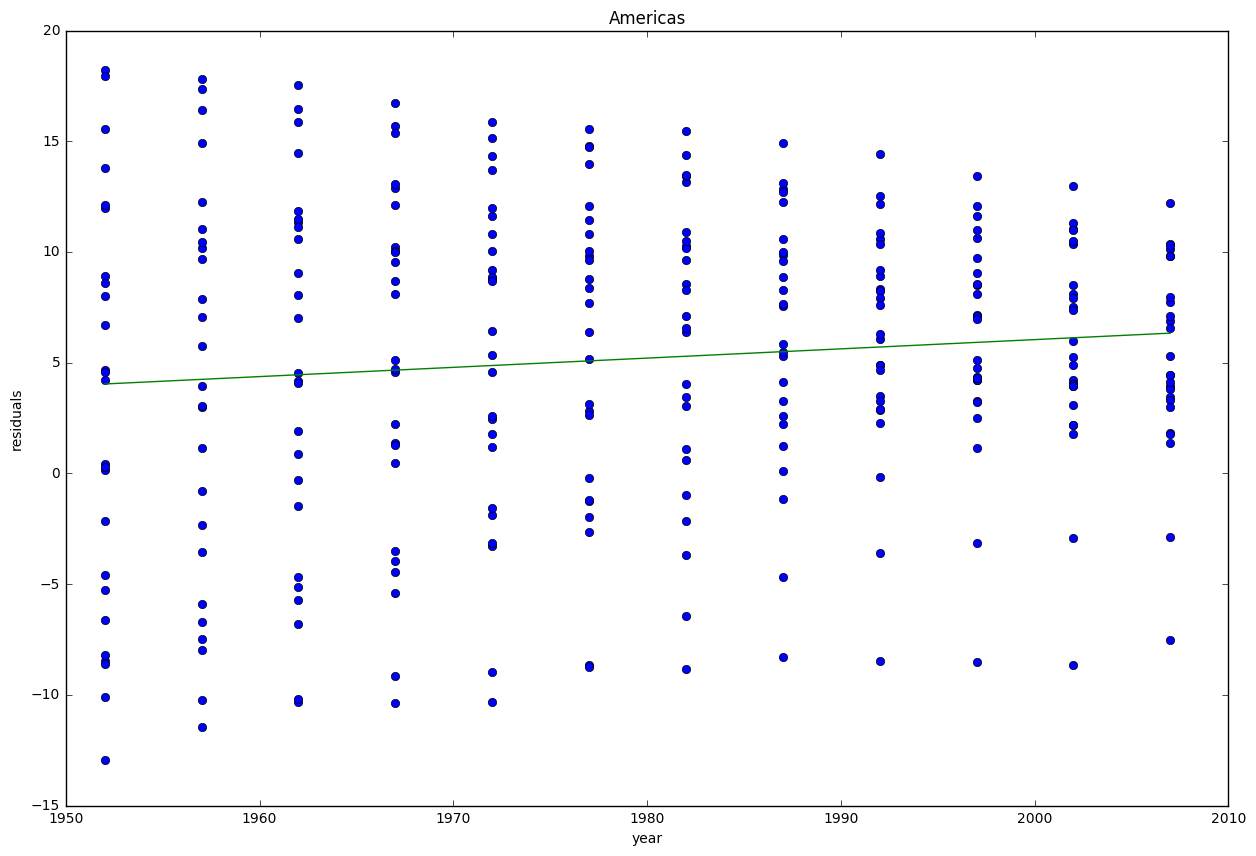

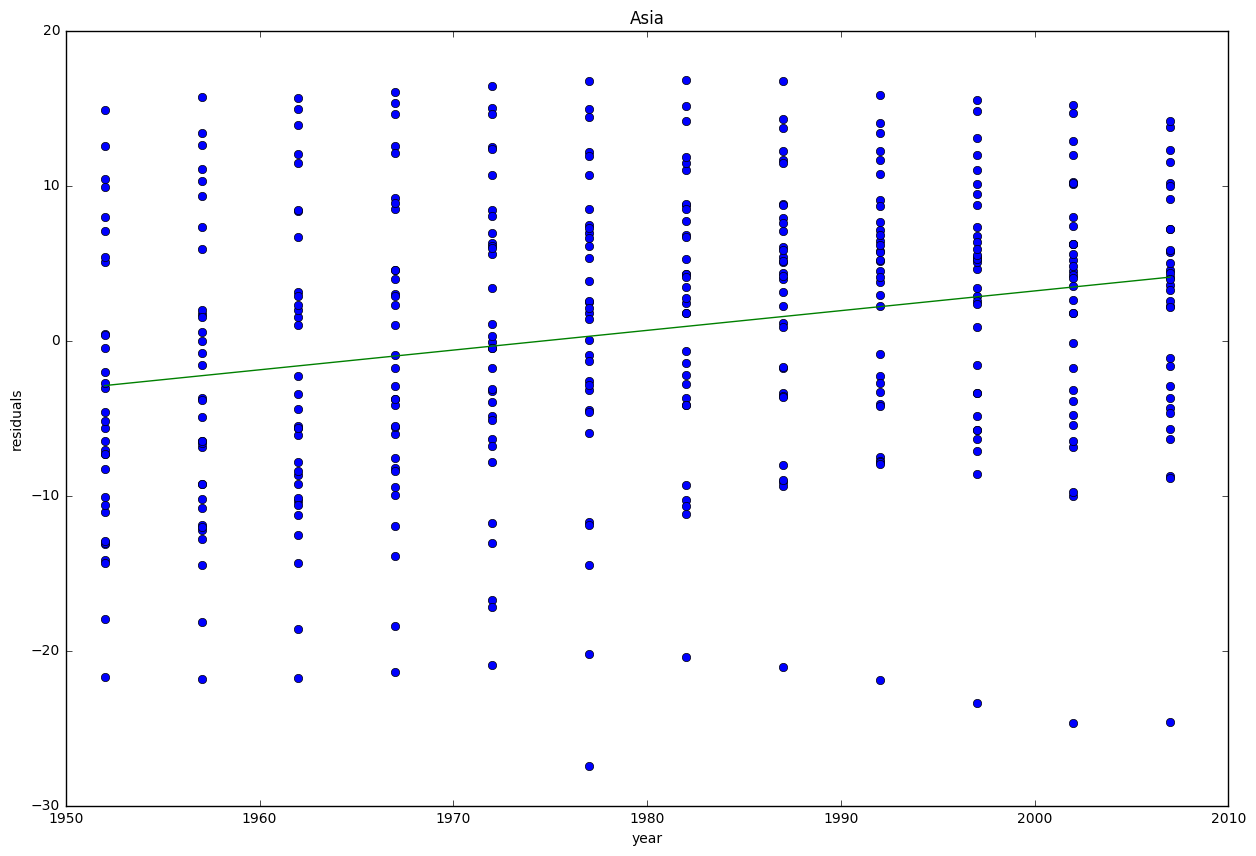

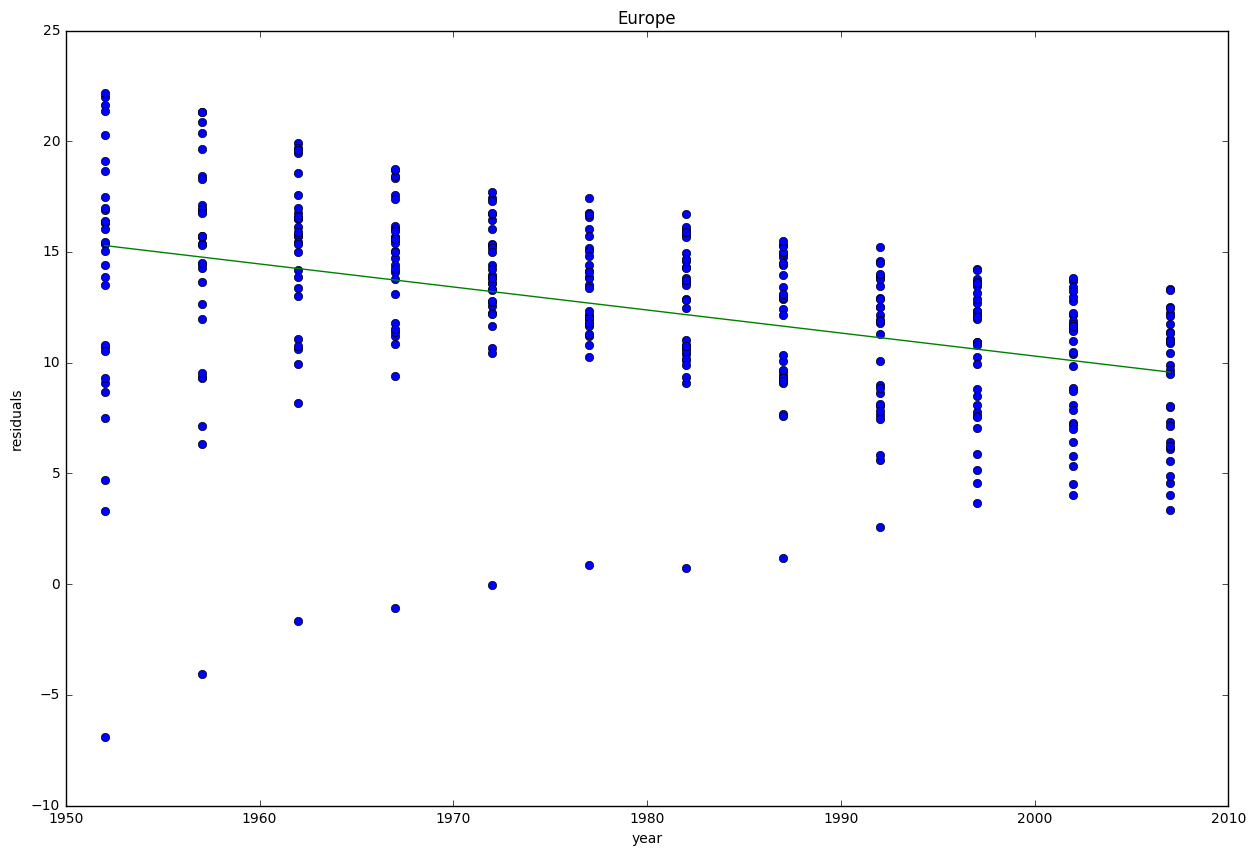

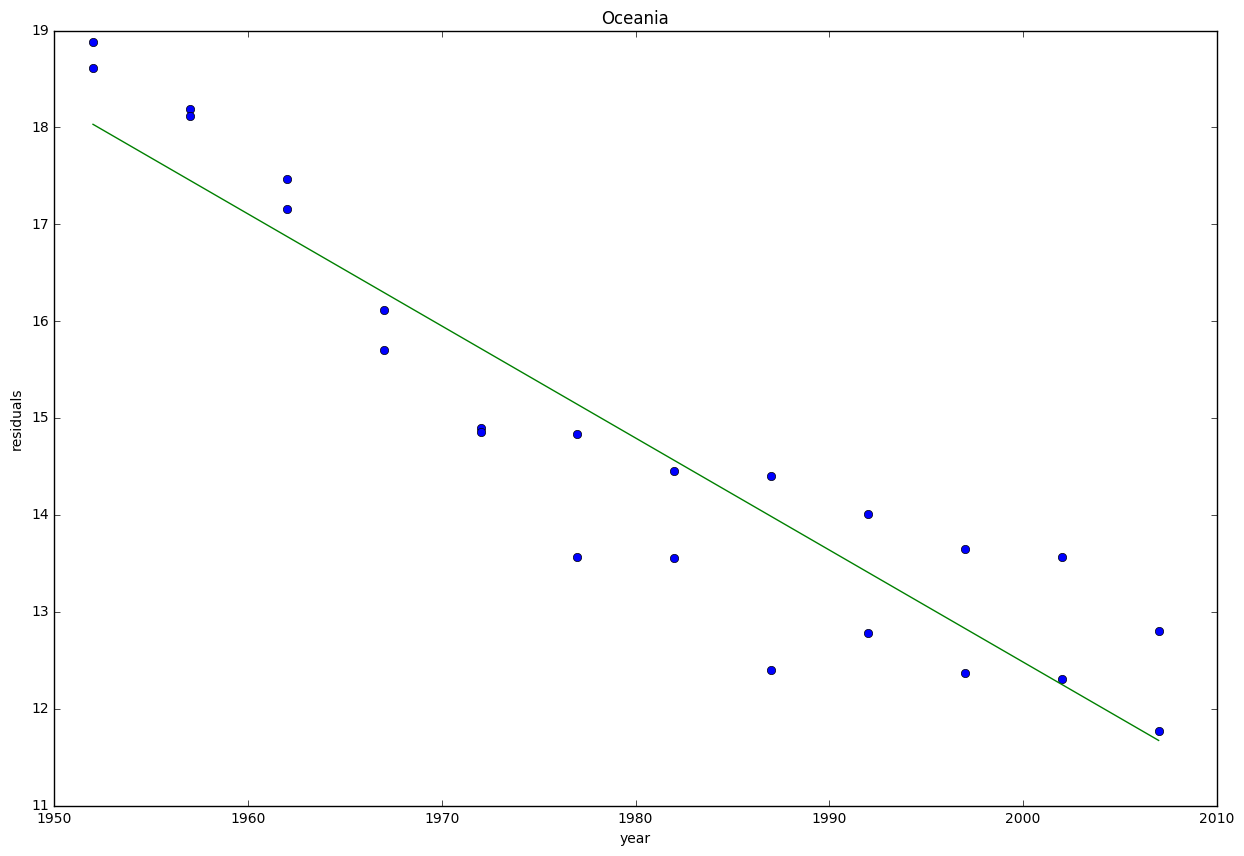

In [175]:
# Exercise5 #

group_names=['Africa','Americas','Asia','Europe','Oceania']
residual_cont_2 = residual_cont.drop(['lifeExp'], 1)

for continent in group_names:
    r_c_table = residual_cont_2.groupby(['continent']).get_group(continent)

    x_d=r_c_table['year'].values
    y_d=r_c_table['residual'].values
    z=np.polyfit(x=x_d,y=y_d,deg=1)
    f=np.poly1d(z)
    x_n = np.linspace(x_d.min(), x_d.max(), 100)
    y_n = f(x_n)
    plt.figure(figsize=(15,10))
    plt.plot(x_d, y_d,'o',x_n,y_n)
    
    plt.xlabel("year")
    plt.ylabel("residuals")
    plt.title(continent)
    plt.show()

In [176]:
# Question10 #
# There should include an interaction term for continent and year in plot because the coefficients for the linear models for each continent 
# are not all the same. From the previous plots, the regression lines for Americas and Asia are monotone increasing function. However, 
# the regression lines for Africa, Europe and Oceania are monotone decreasing function. Moreover, the slope of each plot is totally different.
# For example, the plots for Europe and Oceania are steeper than the plots of Africa and Americas.

In [177]:
# Exercise6 #
result_1 = sm.ols(formula="lifeExp ~ continent*year", data=residual_cont).fit()
print (result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Sun, 23 Apr 2017   Prob (F-statistic):               0.00
Time:                        17:00:23   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept           

In [178]:
# Question11 #
# Since the normal definition of significantly different from zero is p-value no larger than 0.05. Therefore, according to the data above, 
# we can find that Oceania both with interaction term and without interaction are much bigger than 0.05. Thus we can say that Oceania is not 
# significantly different from zero. But the rest parameters are close to zero.

In [179]:
# Question12 #
print("Coef :")
print(result_1.params)

# The average life exptancy increase each year for each continent is shown by the coeefficient below. Africa is the ommited variable. 
# When we calculate the increase, we evaluate the slope, which is the coeefficient of the year. For the other contenent, we have to add
# their own interaction effect.
#     America: the average increase is 0.078122 + 0.289529 = 0.367651
#     Asia: the average increase is 0.163593 + 0.289529 = 0.453122
#     Europe: the average increase is  -0.067597 + 0.289529 = 0.221932
#     Oceania: the average increase is -0.079257 + 0.289529 = 0.210272
#     Africa: the average increase is  0.289529

Coef :
Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
continent[T.Americas]:year      0.078122
continent[T.Asia]:year          0.163593
continent[T.Europe]:year       -0.067597
continent[T.Oceania]:year      -0.079257
dtype: float64


In [180]:
# Exercise7 #
print("Linear Regression A, F stat: ",result.fvalue)
print("Linear Regression A, F stat(p_value): ", result.f_pvalue)
print("\n")
print("Linear Regression B, F stat: ", result_1.fvalue)
print("Linear Regression B, F stat(p_value): ", result_1.f_pvalue)

Linear Regression A, F stat:  398.604745712
Linear Regression A, F stat(p_value):  7.54679462559e-80


Linear Regression B, F stat:  424.27290234
Linear Regression B, F stat(p_value):  0.0


In [181]:
# Question13 #
#Yes, interaction model significantly better than the year-only model. 
# Compared with two OLS regression results, the interaction model has a higher R-squared and F-statistic.
# If we interpret this in the context of the data we know this to make sense because the different continents 
# are improving in quality of life, and thus life expectancy, at different rates. 
# By creating an interaction between continent and year we are able to more accurately model life expectancy.

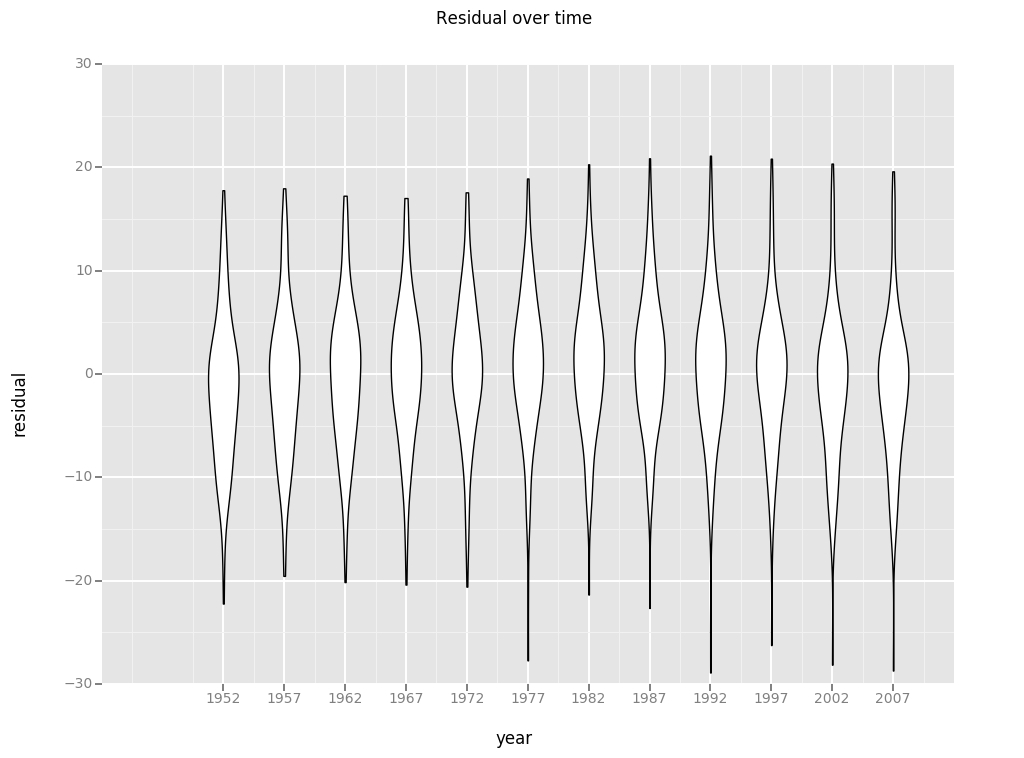

<ggplot: (96225140274)>

In [183]:
# Exercise8 #
from statsmodels.sandbox.regression.predstd import wls_prediction_std

year_res_OLS = pd.DataFrame({'year': residual_cont["year"].values, 'residual': residual_cont["lifeExp"].values-result_1.fittedvalues})

ggplot(aes(x='year', y='residual'), data = year_res_OLS) +\
    geom_violin() +\
    labs(title="Residual over time",
         x = "year",
         y = "residual")